In [1]:
import pandas as pd 
import numpy as np 

In [13]:
boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep = "\s+", usecols= [5,13], names = ["RM","MEDV"])

In [15]:
boston.head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


# Simple Linear regression

In [17]:
X = boston.drop("MEDV", axis = 1).values #delete target variable
Y = boston["MEDV"].values #target variable

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [21]:
from sklearn.linear_model import LinearRegression
ll = LinearRegression()
ll.fit(X_train, Y_train)
Y_pred = ll.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [22]:
#Loss Function: MSE for scikit-learn

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred) #not bad

33.71974681310088

In [25]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred) 
#from 0.3 - 0.5 the model is weak
#from 0.5 - 0.7 the model is not bad
#from 0.7 - 0.9 the model is good
#from 0.9 - 1 the model is perfect

0.6128870747137976

In [27]:
#Build a graph for the coefficient
import matplotlib.pyplot as plt
print("Peso di RM :"+ str(ll.coef_[0]))
print("Bias :"+ str(ll.intercept_))

Peso di RM :8.220673215681968
Bias :-28.880486811139196


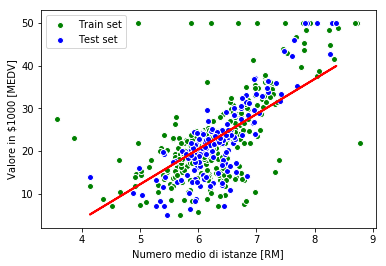

In [29]:
plt.scatter(X_train, Y_train, c = "green", 
            edgecolor ="white", label = "Train set")
plt.scatter(X_test, Y_test, c = "blue", edgecolor ="white", 
            label = "Test set")
plt.xlabel("Numero medio di istanze [RM]")
plt.ylabel("Valore in $1000 [MEDV]")

plt.legend(loc = "upper_left")
plt.plot(X_test, Y_pred, color = 'red', linewidth = 2)

The model's straight line is a good aproximation, we have an error due to the presence of outliers

# Multiple regression

In [30]:
boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep = "\s+", names = ["Crim","Zn","Indus","Chas","Nox","RM","AGE","Dis","Rad","Tax","Pratio","B","Lstat","MEDV"])

In [31]:
boston.head()

,Crim,Zn,Indus,Chas,Nox,RM,AGE,Dis,Rad,Tax,Pratio,B,Lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [32]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
Crim      506 non-null float64
Zn        506 non-null float64
Indus     506 non-null float64
Chas      506 non-null int64
Nox       506 non-null float64
RM        506 non-null float64
AGE       506 non-null float64
Dis       506 non-null float64
Rad       506 non-null int64
Tax       506 non-null float64
Pratio    506 non-null float64
B         506 non-null float64
Lstat     506 non-null float64
MEDV      506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [33]:
# Chas-Rad are categorical variable

In [35]:
correl = boston.corr()

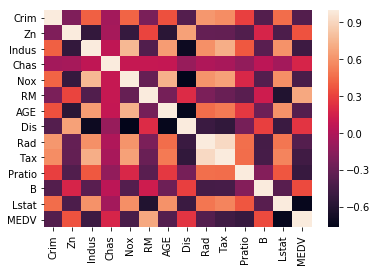

In [36]:
import seaborn as sns
sns.heatmap(correl, xticklabels=boston.columns, yticklabels=boston.columns)

In [37]:
cols = ["RM","Lstat","Pratio","Tax","Indus","MEDV"]

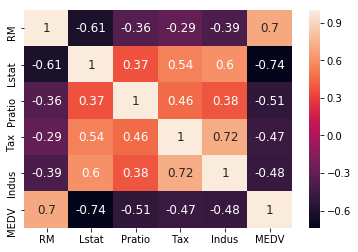

In [38]:
sns.heatmap(boston[cols].corr(), xticklabels=boston[cols].columns, yticklabels=boston[cols].columns, annot = True, annot_kws = {'size':12})

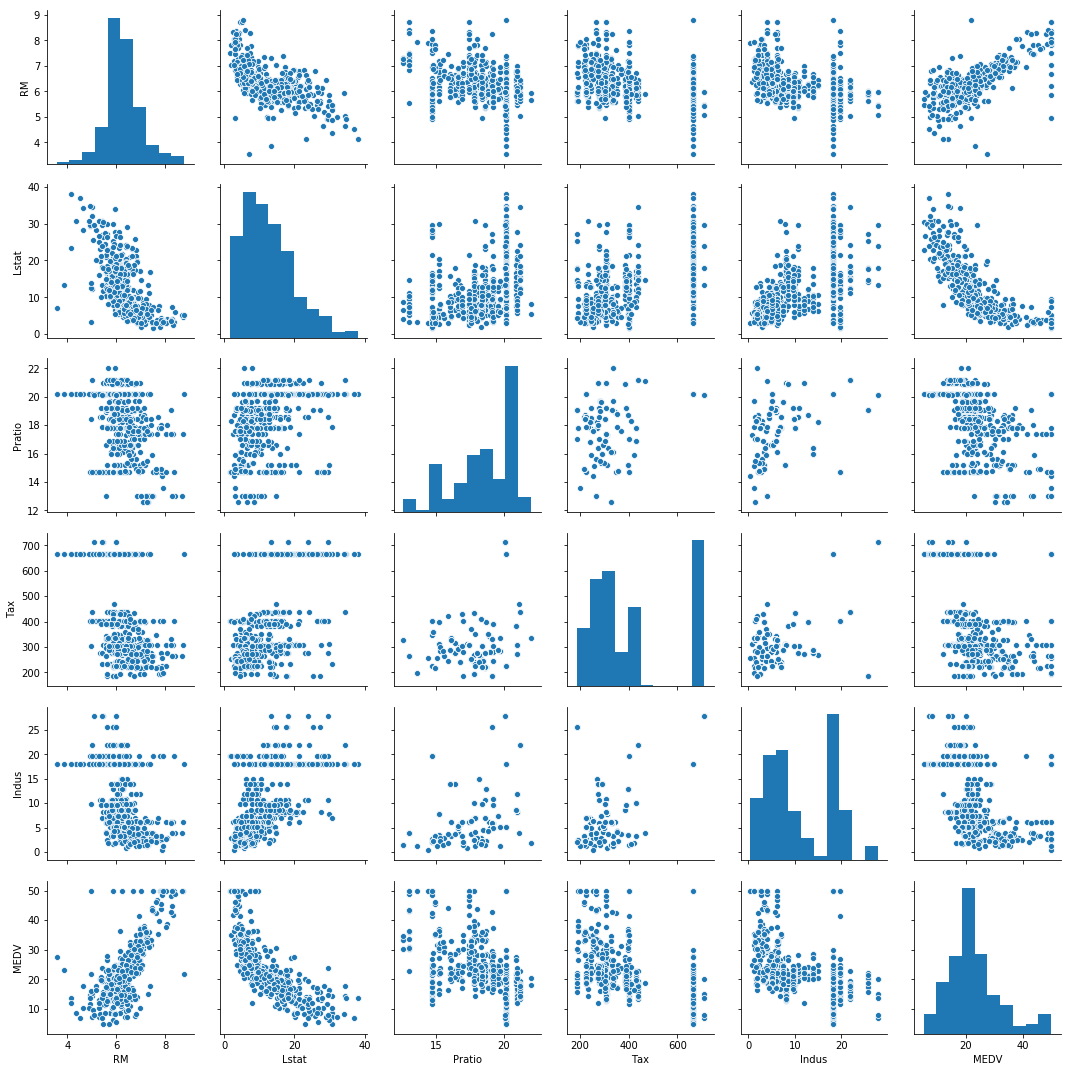

In [39]:
sns.pairplot(boston[cols])

We are going to choose RM and Lstat variables --> strong correlation with y

In [40]:
X = boston[["RM","Lstat"]].values
Y = boston["MEDV"].values

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [43]:
ll = LinearRegression()
ll.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
Y_pred = ll.predict(X_test)

In [46]:
print("MSE: "+str(mean_squared_error(Y_test, Y_pred)))
print("R-squared: "+str(r2_score(Y_test, Y_pred)))

MSE: 32.72507169281496
R-squared: 0.6069792285352371


In [47]:
#Now let's try with other features

In [48]:
X = boston.drop("MEDV", axis = 1).values
Y = boston["MEDV"].values

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

We have different scales, so: 

In [53]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train) #built the model with fit
X_test_std = ss.transform(X_test)  #use the model without fit

In [54]:
ll = LinearRegression()
ll.fit(X_train_std,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
Y_pred = ll.predict(X_test_std)

In [56]:
print("MSE: "+str(mean_squared_error(Y_test, Y_pred)))
print("R-squared: "+str(r2_score(Y_test, Y_pred)))

MSE: 27.195965766883205
R-squared: 0.6733825506400195


In [57]:
#Not bad!

In [59]:
list(zip(boston.columns, ll.coef_)) #see weigths
#RM and Lstat have higher weights

[('Crim', -1.01190058959815),
 ('Zn', 1.0502802743032682),
 ('Indus', 0.07920966467269847),
 ('Chas', 0.6189619959077605),
 ('Nox', -1.8736910171630807),
 ('RM', 2.705269785111315),
 ('AGE', -0.2795726389182992),
 ('Dis', -3.0976648638690625),
 ('Rad', 2.0968999836727624),
 ('Tax', -1.8860633909786935),
 ('Pratio', -2.2611046607987717),
 ('B', 0.5826430949043793),
 ('Lstat', -3.440498377942624)]

# Polinomial Regression: 


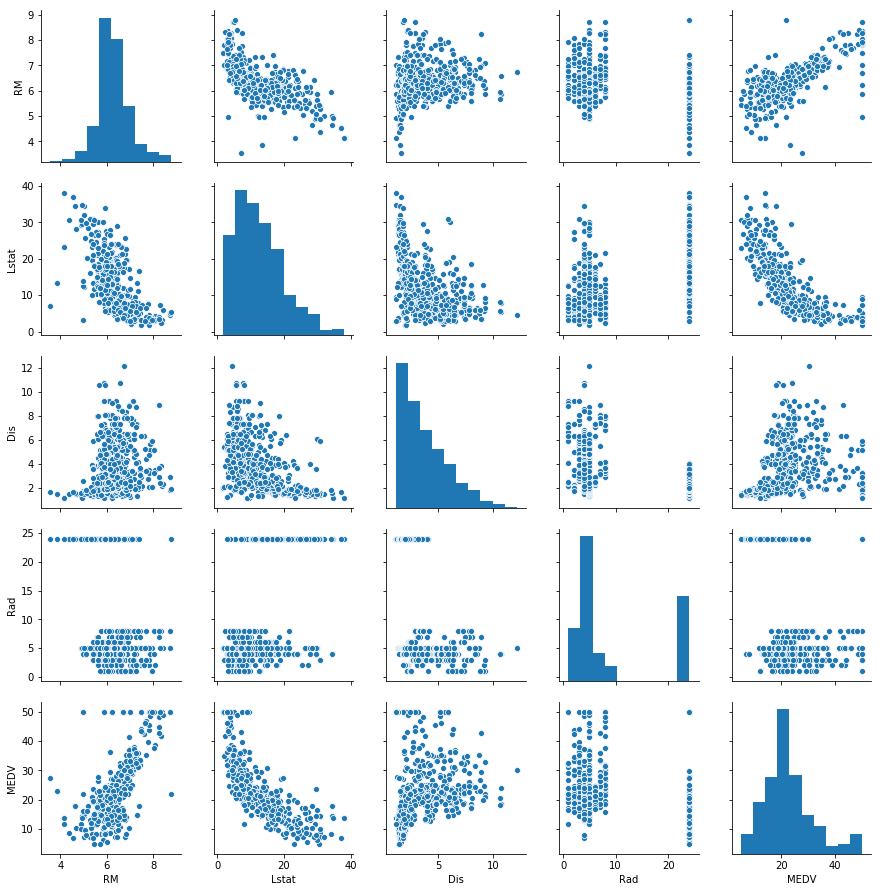

In [60]:
cols = ["RM", "Lstat","Dis","Rad","MEDV"]
sns.pairplot(boston[cols])

The relation between Lstat and Medv isn't linear

In [69]:
X = boston.drop("MEDV",axis = 1).values
Y = boston["MEDV"].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [70]:
from sklearn.preprocessing import PolynomialFeatures
polyfeats = PolynomialFeatures(degree = 2)

In [71]:
X_train_poly = polyfeats.fit_transform(X_train)
X_test_poly = polyfeats.fit_transform(X_test)

In [64]:
X_train[:3]

array([[34.41],
       [ 7.73],
       [16.96]])

In [65]:
X_train_poly[:3]

array([[1.0000000e+00, 3.4410000e+01, 1.1840481e+03],
       [1.0000000e+00, 7.7300000e+00, 5.9752900e+01],
       [1.0000000e+00, 1.6960000e+01, 2.8764160e+02]])

The first one is raised to 0, the second one is raised to 1 and the third one is raised to 2 (look by row)

For makeing a comparison we should do a loop for the model with different degress

In [72]:
for i in range(1,5): 
    polyfeats = PolynomialFeatures(degree = i)
    X_train_poly = polyfeats.fit_transform(X_train)
    X_test_poly = polyfeats.fit_transform(X_test)
    ll = LinearRegression()
    ll.fit(X_train_poly, Y_train)
    Y_pred = ll.predict(X_test_poly)
    
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    print("Degree"+str(i)+": MSE ="+str(mse)+" R2="+str(r2))

Degree1: MSE =27.195965766883294 R2=0.6733825506400185
Degree2: MSE =29.25250713927716 R2=0.6486839499978417
Degree3: MSE =85912.07842615411 R2=-1030.784793571643
Degree4: MSE =546667.2171239214 R2=-6564.350671354249


# Overfitting: 

In [76]:
X = boston.drop("MEDV",axis = 1).values
Y = boston["MEDV"].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [77]:
#We are going to create, on purpose, the overfitting:

In [78]:
from sklearn.preprocessing import PolynomialFeatures
polyfeats = PolynomialFeatures(degree = 2)

In [79]:
X_train_poly = polyfeats.fit_transform(X_train)
X_test_poly = polyfeats.fit_transform(X_test)

In [83]:
X_train_poly.shape #354 osservations and 105 properties

(354, 105)

In [84]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_poly = ss.fit_transform(X_train_poly) #built the model with fit
X_test_poly = ss.transform(X_test_poly)  #use the model without fit

In [85]:
ll = LinearRegression()
ll.fit(X_train_poly,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [86]:
# We are going to do the prediction on training set: 
Y_pred_train = ll.predict(X_train_poly)

In [90]:
mse_train = mean_squared_error(Y_train, Y_pred_train )
r2_train = r2_score(Y_train, Y_pred_train )
print("Train MSE ="+str(mse_train)+"; Train R2="+str(r2_train))

Train MSE =4.09203433047596; Train R2=0.9517246762476053


In [93]:
Y_pred_test = ll.predict(X_test_poly)

In [95]:
mse_test = mean_squared_error(Y_test, Y_pred_test)
r2_test = r2_score(Y_test, Y_pred_test)
print("Test MSE ="+str(mse_test)+"; Test R2="+str(r2_test))

Test MSE =29.252507139199594; Test R2=0.6486839499987733


--> high overfitting

In [105]:
def overfit_eval(model, X, Y):
    
    """
    model: il nostro modello predittivo già addestrato
    X: una tupla contenente le prorietà del train set e test set (X_train, X_test)
    Y: una tupla contenente target del train set e test set (Y_train, Y_test)
    """
    
    Y_pred_train = model.predict(X[0])
    Y_pred_test = model.predict(X[1])
    
    mse_train = mean_squared_error(Y[0], Y_pred_train)
    mse_test = mean_squared_error(Y[1], Y_pred_test)

    r2_train = r2_score(Y[0], Y_pred_train)
    r2_test = r2_score(Y[1], Y_pred_test)    
    
    print("Train set:  MSE="+str(mse_train)+" R2="+str(r2_train))
    print("Test set:  MSE="+str(mse_test)+" R2="+str(r2_test))

# Defeat overfitting: 

• Regolarization L1 and L2.

Regularisation penalises larger weights in the loss function during training phase, reducing model complexity and variance, resulting in a more regular model that is less prone to fluctuation. 

• When we use regolarization our data must be in the same scale (standardization or normalization)

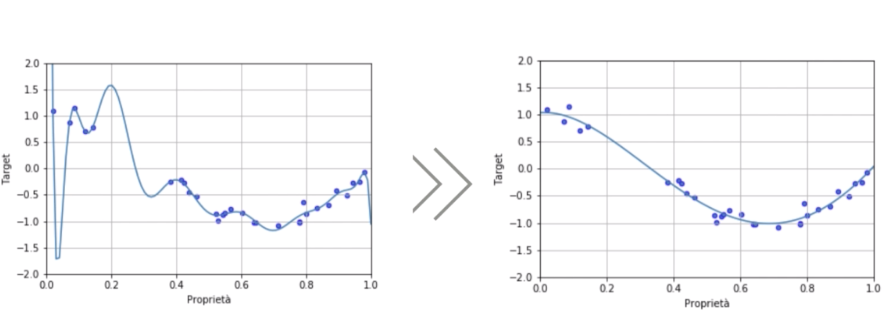

In [99]:
from IPython.display import Image
img = '/Users/lorenzofamiglini/Desktop/reg.png'
Image(filename=img)

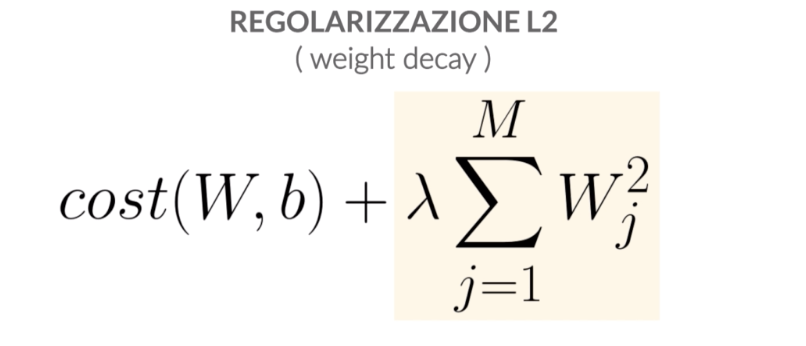

In [100]:
from IPython.display import Image
img = '/Users/lorenzofamiglini/Desktop/l2.png'
Image(filename=img)

The new term is given by the sum of the squares of weights, it will force the gradient descent to seek the minimum of this cost function by value with smaller weights. Lamda is another hyperparameter, checks the weight that regularization it will have on the model. 

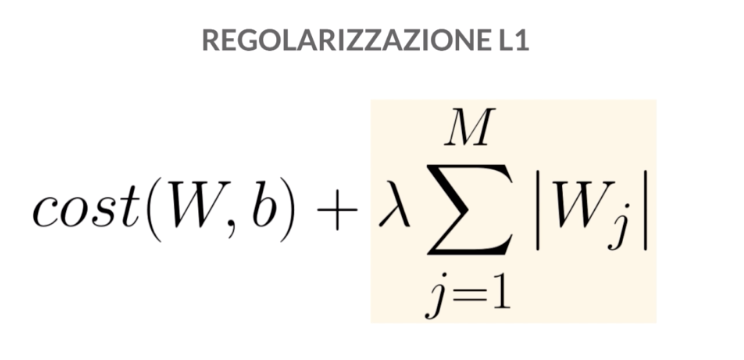

In [101]:
from IPython.display import Image
img = '/Users/lorenzofamiglini/Desktop/l1.png'
Image(filename=img)

The new term to be added to the cost function during training is the sum of the absolute value of the weights. Properties with less important values will go to zero

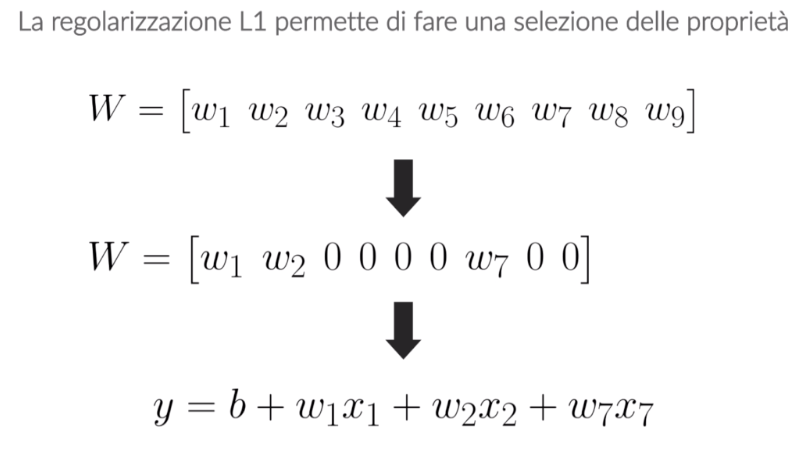

In [102]:
from IPython.display import Image
img = '/Users/lorenzofamiglini/Desktop/reg11.png'
Image(filename=img)

It looks like a "features selection". Usually, l2 is better than l1, but the best strategy is to analyse both (Elastic Net).

• How should we choose lambda? 

If lambda = 0, we are going to do a normal regression without regolarization. If lamda goes to infinity --> the regularization will produce Underfitting. 

So the the best strategy is to choose lamda in range between 0.0001 and 10

Let's try!

In [103]:
# Let's reuse the previous model with overfitting

• __Ridge__: l2 regularization

In [106]:
from sklearn.linear_model import Ridge

In [107]:
alphas = [0.0001, 0.001, 0.01, 0.1 ,1 ,10] #alpha corrispone a lambda

for alpha in alphas:
    print("Alpha="+str(alpha))
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_poly, Y_train)

    overfit_eval(ridge, (X_train_poly, X_test_poly),(Y_train, Y_test))

Alpha=0.0001
Train set:  MSE=4.0992634048774095 R2=0.9516393920395622
Test set:  MSE=28.917618463194337 R2=0.6527058878888986
Alpha=0.001
Train set:  MSE=4.113502509945304 R2=0.9514714077677838
Test set:  MSE=28.420009267339573 R2=0.6586820627275236
Alpha=0.01
Train set:  MSE=4.208206127238706 R2=0.9503541522864911
Test set:  MSE=26.81329501814371 R2=0.677978340507139
Alpha=0.1
Train set:  MSE=4.747028830953837 R2=0.9439974508597064
Test set:  MSE=23.631755117358278 R2=0.71618792116108
Alpha=1
Train set:  MSE=5.875947305341913 R2=0.9306791596529939
Test set:  MSE=17.634584627529325 R2=0.7882125937009352
Alpha=10
Train set:  MSE=8.81275552173788 R2=0.896032488585423
Test set:  MSE=17.159715774774114 R2=0.7939156621191297


• __Lasso__: l1 regularization

In [108]:
from sklearn.linear_model import Lasso

In [111]:
alphas = [0.0001, 0.001, 0.01, 0.1 ,1 ,10] #alpha corrispone a lambda

for alpha in alphas:
    print("Alpha="+str(alpha))
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_poly, Y_train)

    overfit_eval(lasso, (X_train_poly, X_test_poly),(Y_train, Y_test))

Alpha=0.0001
Train set:  MSE=5.391123652697101 R2=0.9363988132296843
Test set:  MSE=29.701776720600815 R2=0.6432883230881461
Alpha=0.001
Train set:  MSE=5.407317548867126 R2=0.936207767525449
Test set:  MSE=28.78801855730654 R2=0.6542623536919961
Alpha=0.01
Train set:  MSE=6.0638588169003205 R2=0.9284622943178907
Test set:  MSE=22.933242012656393 R2=0.7245769068863108
Alpha=0.1
Train set:  MSE=11.833211121207539 R2=0.860398996740507
Test set:  MSE=19.296152342816384 R2=0.768257538096078
Alpha=1
Train set:  MSE=21.590985067091978 R2=0.7452827346818105
Test set:  MSE=27.25804314512913 R2=0.6726370152499754
Alpha=10
Train set:  MSE=84.76451346994796 R2=0.0
Test set:  MSE=83.76673764512785 R2=-0.0060197319476869016


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [112]:
# We can see that for alpha = 10, the hyperparameter penalizes too much the weights

• Elastic Net: l1 and l2 together

In [113]:
from sklearn.linear_model import ElasticNet

In [114]:
alphas = [0.0001, 0.001, 0.01, 0.1 ,1 ,10] #alpha corrispone a lambda

for alpha in alphas:
    print("Alpha="+str(alpha))
    elastic = ElasticNet(alpha=alpha)
    elastic.fit(X_train_poly, Y_train)

    overfit_eval(elastic, (X_train_poly, X_test_poly),(Y_train, Y_test))

Alpha=0.0001
Train set:  MSE=5.391059281137909 R2=0.9363995726460551
Test set:  MSE=29.466017582883627 R2=0.6461197374561647
Alpha=0.001
Train set:  MSE=5.463124643400419 R2=0.9355493894819877
Test set:  MSE=26.238997938658407 R2=0.6848755196286389
Alpha=0.01
Train set:  MSE=6.6699478752202905 R2=0.921312025490655
Test set:  MSE=15.784424726986353 R2=0.8104325991533364
Alpha=0.1
Train set:  MSE=12.092531251957979 R2=0.8573396960952863
Test set:  MSE=20.123693597792272 R2=0.7583189532244381
Alpha=1
Train set:  MSE=21.17885700785976 R2=0.7501447700119411
Test set:  MSE=27.923580301576493 R2=0.6646440632674491
Alpha=10
Train set:  MSE=70.28359861834348 R2=0.1708369960353573
Test set:  MSE=69.68198552608109 R2=0.16313498207951238


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


For lambda = 0.01 we found the best solution, also for the overfitting